In [1]:
'''This XGBoost_WSM script is designed to take in an observation dataframe and make a prediction for the upcoming summer season
    for select water system components (WSC).

'''

'This XGBoost_WSM script is designed to take in an observation dataframe and make a prediction for the upcoming summer season\n    for select water system components (WSC).\n\n'

In [2]:
import XGB_Model_v3_uncertainty as XGB_Model
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [3]:

#This is the final dataset to make predictions on
p = Path('GS_Simulations')
Sims = {i.stem[0:12] : pd.read_excel(i, skiprows = 5) for i in p.glob('**/*.xlsx')}



Processing data into features/targets for  Wet  scenario
Processing  Mod_Wet  conditions
Processing  Mod_Wet_Low  conditions
Processing  Mod_Wet_Hig  conditions
Processing  Obs_Wet  conditions


prediction time 7 s
Predictions Complete
Calculating historical water system component means to create baseline for comparison with prediction


100% |########################################################################|


Processing predictions and historical means for comparative performance analysis.
Initiating water system component RRV analysis.
Setting up an RRV dataframe and calculating each water system component RRV
Finalizing analysis and placing into Jenks classification categories.
Plotting results for visual analysis:
Using the  45 % &  15 % capacities for Mountain & Little Dell Reservoirs
and the historical daily mean municipal groundwater withdrawal and Deer Creek Reservoir use:
 Green  shading suggests satisfactory conditions.
 Red  shading suggests unsatisfactory conditions.
 
Expected April - October volume of Groundwater withdrawal is  13249 AcreFeet , range :  12543 - 13903 AcreFeet
Expected April - October volume of Deer Creek water use is  1697 AcreFeet , range :  353 - 4803 AcreFeet


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


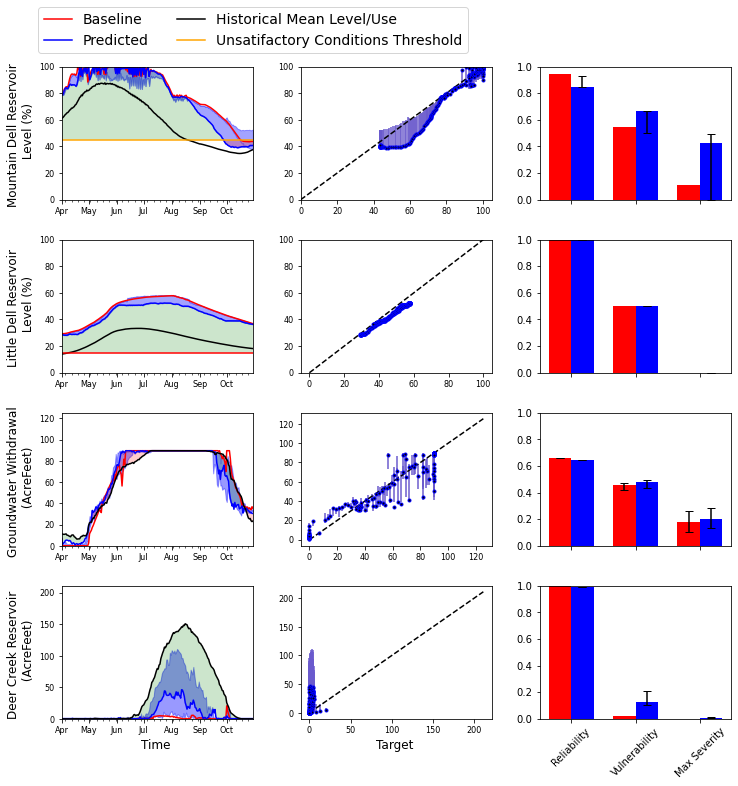

In [5]:
#Model set up
evalyear = 2021

MDell_Thresh = 45
LDell_Thresh = 15
#Unit options are Million Gallons (MG), Acre-Feet (AcreFeet), and 1x10^4 m3 (x10^4m3)

units = 'AcreFeet'

#Existing climate scenarios are Wet, Ave, Dry
scenario = 'Wet'

#Connect to XGB_Model prediction class, future options to select units (MGD vs acre-feet/day)
xgb = XGB_Model.XGB_Prediction(MDell_Thresh, LDell_Thresh, units, Sims, scenario, evalyear, figsave = True)

'''
Process data to have testing features and targets
Scenario needs to be the xlsx file within Sims and contains all features necessary for a prediction.
In this example we have 'Ave, Dry, Wet' If there are observations, set observations = True

'''
#If comparing against historical obsrvations, set observations to True, if making a forecast or prediction set to False
xgb.ProcessData(observations = True)

#Make WSM predictions
xgb.WSM_Predict()
